# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

%matplotlib inline

In [18]:
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [6]:
file = 'D:/Ineuron/Project_workshop/Lead_Scoring_/Data/raw_data.csv'

data = pd.read_csv(file, sep=';')

data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [7]:
## Dropping 'duration'column as basedon UCI Repository attribute information

data.drop('duration', axis='columns', inplace=True)

data.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
5899,27,blue-collar,married,basic.4y,no,yes,no,telephone,may,mon,5,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
20856,57,technician,married,university.degree,no,no,no,cellular,aug,thu,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
8328,29,admin.,divorced,professional.course,no,yes,no,telephone,jun,tue,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
40722,31,admin.,single,university.degree,no,yes,yes,cellular,sep,tue,1,999,0,nonexistent,-1.1,94.199,-37.5,0.877,4963.6,yes
12604,36,services,married,high.school,unknown,no,no,cellular,jul,mon,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
5231,27,technician,single,professional.course,no,yes,no,telephone,may,fri,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
27262,52,admin.,married,high.school,no,no,no,cellular,nov,fri,1,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,no
31314,39,unemployed,married,high.school,no,no,no,cellular,may,wed,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
653,39,blue-collar,married,basic.9y,no,no,yes,telephone,may,tue,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6009,35,technician,married,professional.course,no,yes,yes,telephone,may,tue,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Lets do Descriptive stats

In [4]:

data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
## Dataset consist of 21 columns,
## Lets see the dataset info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [6]:
# Checking Null present in data
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Lets create EDA report using Pandas-Profile library

In [7]:
#report = ProfileReport(data, minimal=False)

# report.to_file("output.html")

In [8]:
# the above code created a error because not able to produce the report dur to high ram consumption.
# So genrated report on Colab

In [9]:
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

### Lets do bivariate analysis on data

<AxesSubplot:xlabel='age', ylabel='Density'>

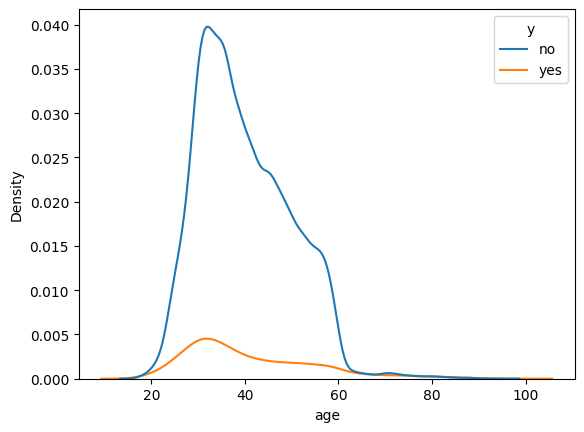

In [11]:
sns.kdeplot(data['age'], hue=data['y'])

- we can see age between 30 to 40 years category customers tend to convert more than other ages

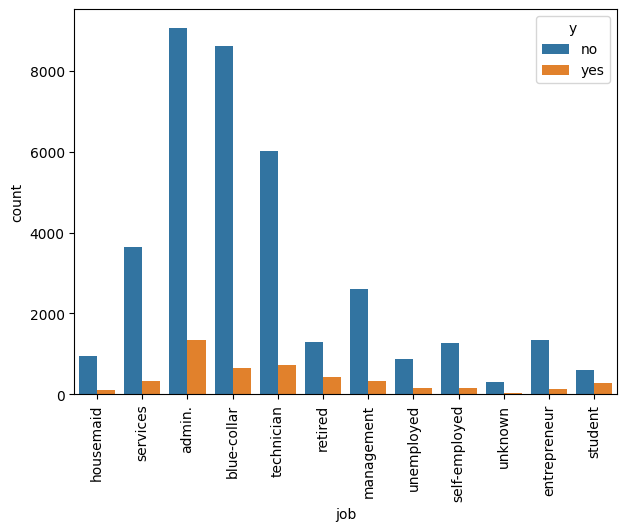

In [128]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data = data, x = data['job'], hue= data['y'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

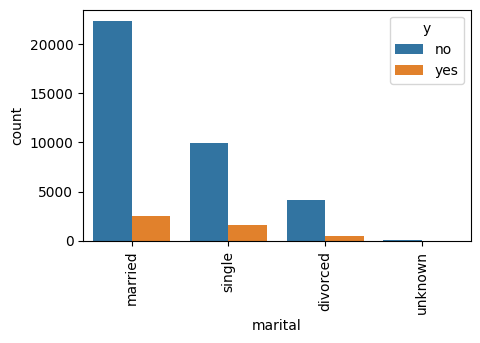

In [129]:
plt.figure(figsize=(5,3))
ax = sns.countplot(data = data, x = data['marital'], hue= data['y'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

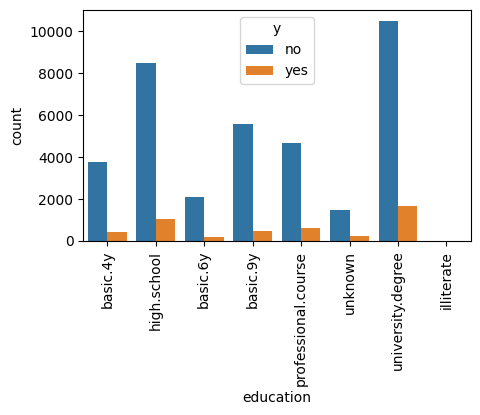

In [130]:
plt.figure(figsize=(5,3))
ax = sns.countplot(data = data, x = data['education'], hue= data['y'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

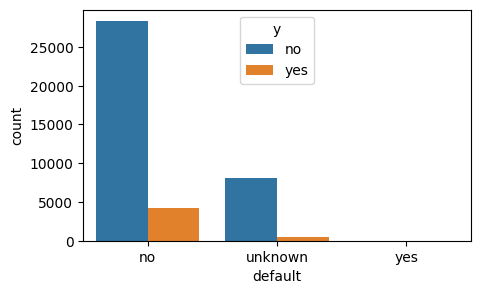

In [131]:
plt.figure(figsize=(5,3))
ax = sns.countplot(data = data, x = data['default'], hue= data['y'])

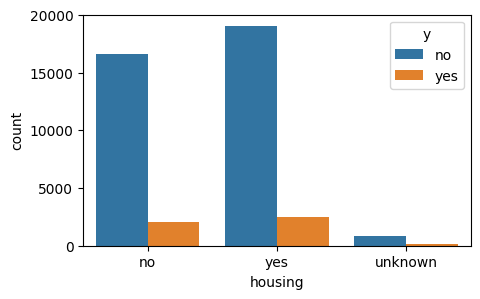

In [132]:
plt.figure(figsize=(5,3))
ax = sns.countplot(data = data, x = data['housing'], hue= data['y'])

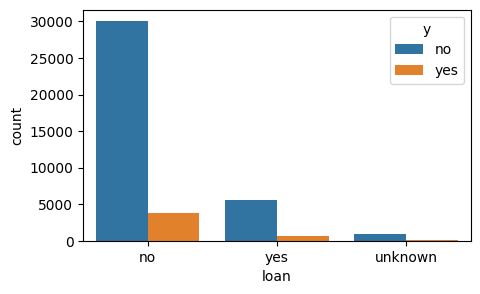

In [133]:
plt.figure(figsize=(5,3))
ax = sns.countplot(data = data, x = data['loan'], hue= data['y'])

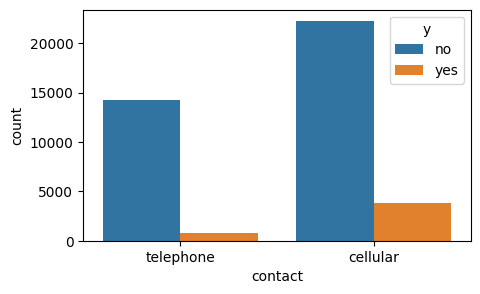

In [134]:
plt.figure(figsize=(5,3))
ax = sns.countplot(data = data, x = data['contact'], hue= data['y'])

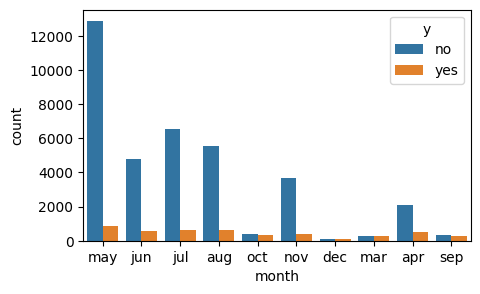

In [135]:
plt.figure(figsize=(5,3))
ax = sns.countplot(data = data, x = data['month'], hue= data['y'])

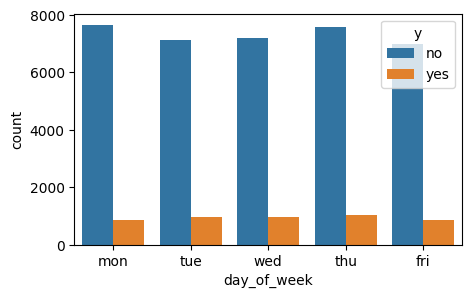

In [136]:
plt.figure(figsize=(5,3))
ax = sns.countplot(data = data, x = data['day_of_week'], hue= data['y'])

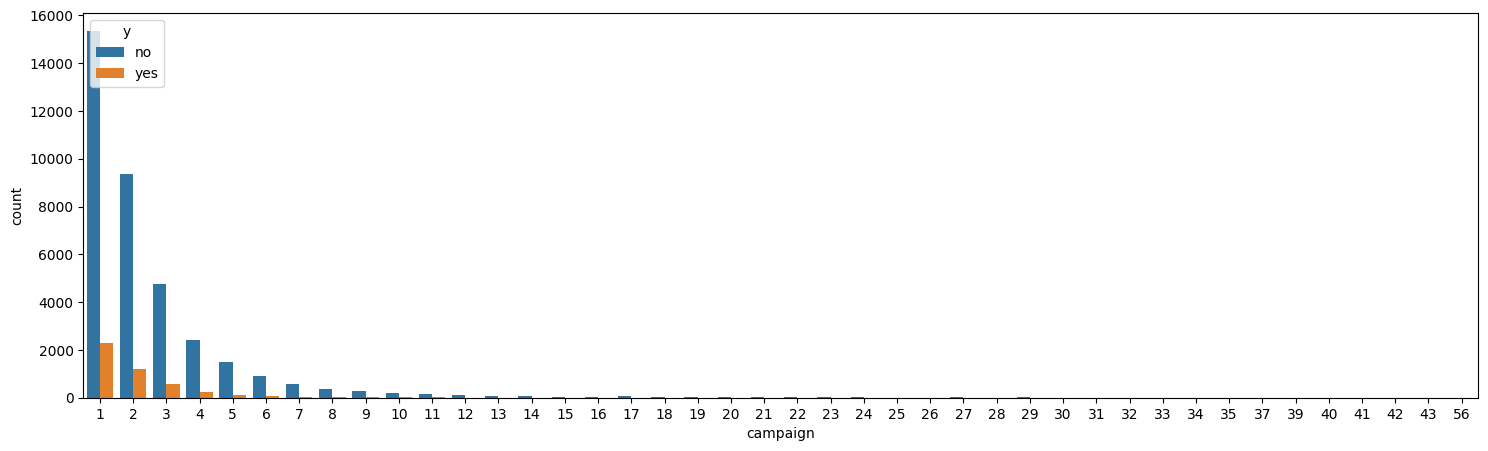

In [149]:
plt.figure(figsize=(18,5))
ax = sns.countplot(data = data, x = data['campaign'], hue= data['y'])

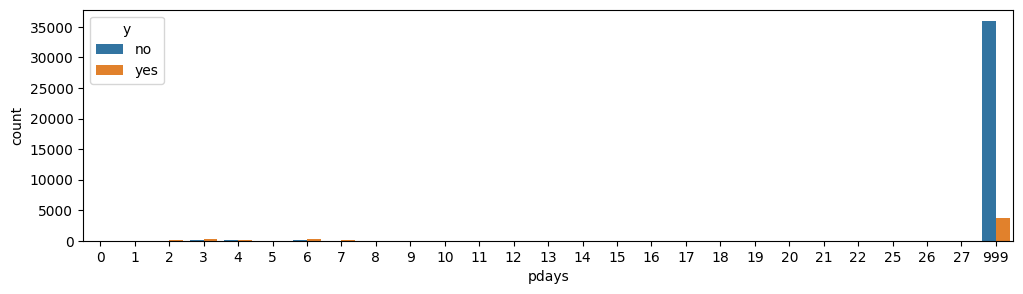

In [155]:
plt.figure(figsize=(12,3))
ax = sns.countplot(data = data, x = data['pdays'], hue= data['y'])

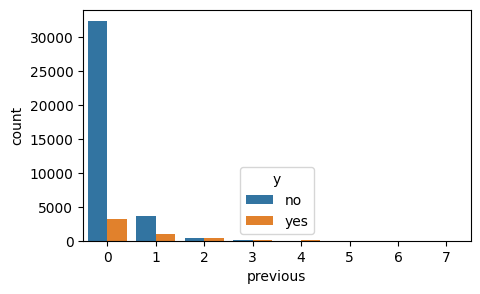

In [158]:
plt.figure(figsize=(5,3))
ax = sns.countplot(data = data, x = data['previous'], hue= data['y'])

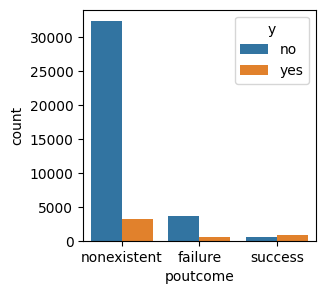

In [160]:
plt.figure(figsize=(3,3))
ax = sns.countplot(data = data, x = data['poutcome'], hue= data['y'])

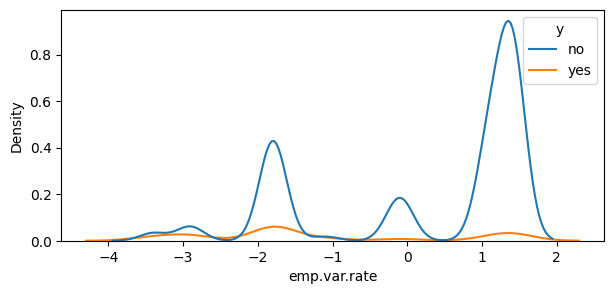

In [197]:
plt.figure(figsize=(7,3))
ax = sns.kdeplot(data = data, x = data['emp.var.rate'], hue= data['y'])

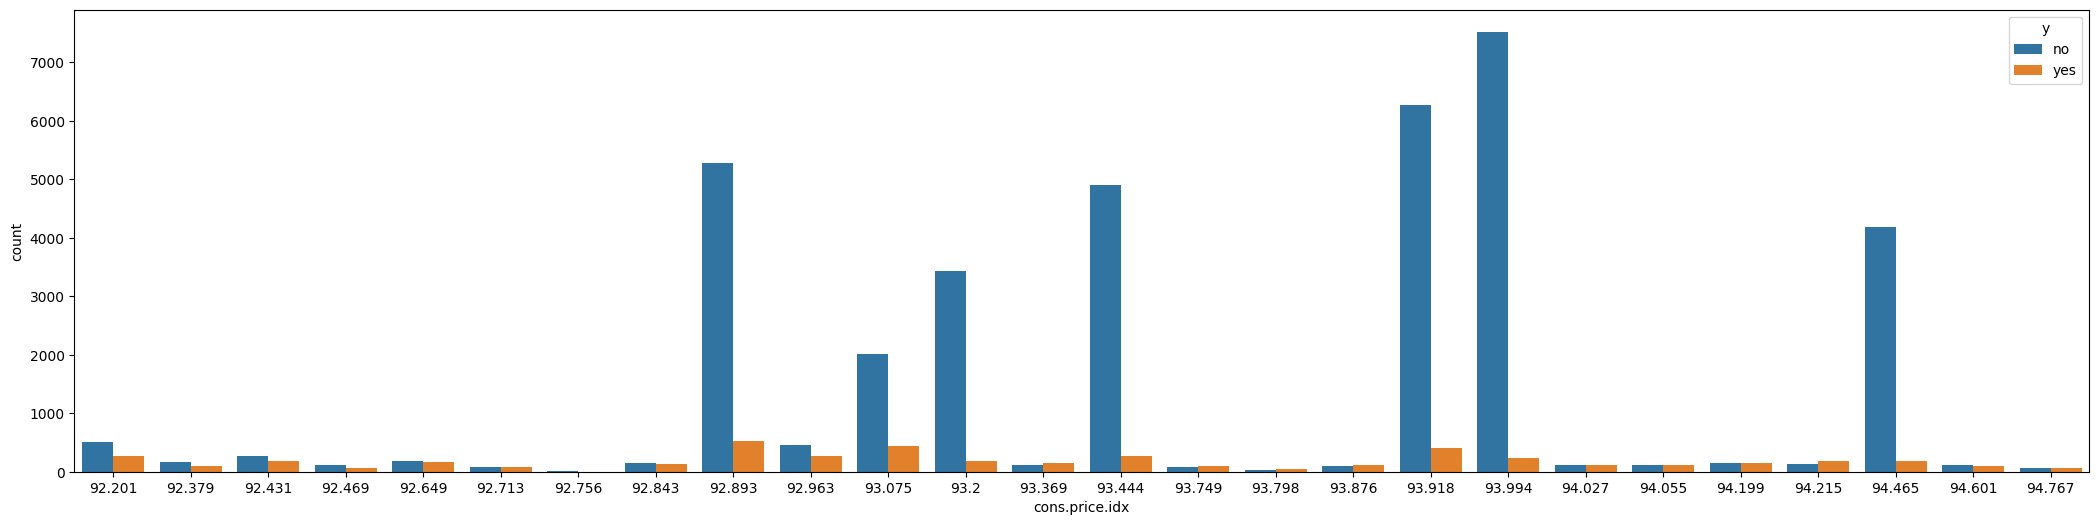

In [173]:
plt.figure(figsize=(26,6))
ax = sns.countplot(data = data, x = data['cons.price.idx'], hue= data['y'])

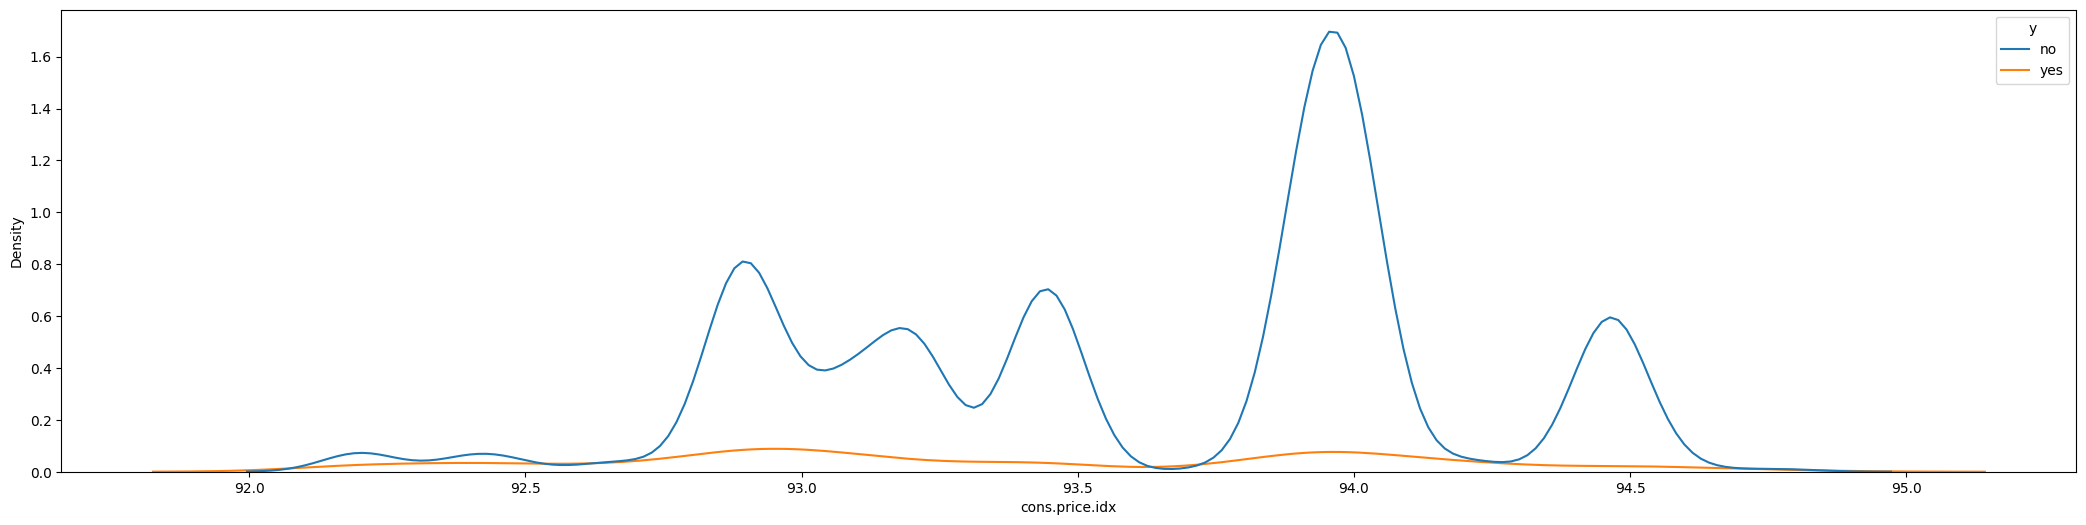

In [199]:
plt.figure(figsize=(26,6))
ax = sns.kdeplot(data = data, x = data['cons.price.idx'], hue= data['y'])

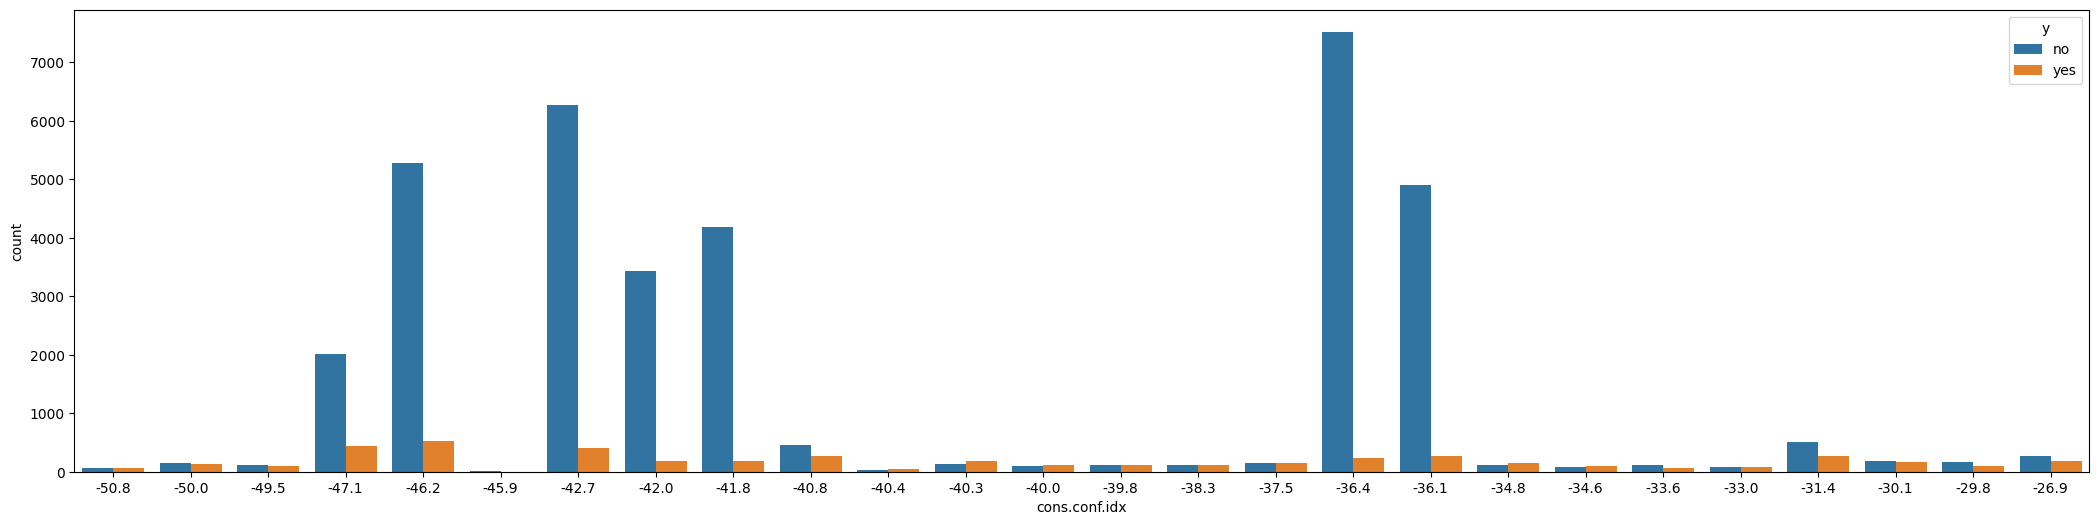

In [175]:
plt.figure(figsize=(26,6))
ax = sns.countplot(data = data, x = data['cons.conf.idx'], hue= data['y'])

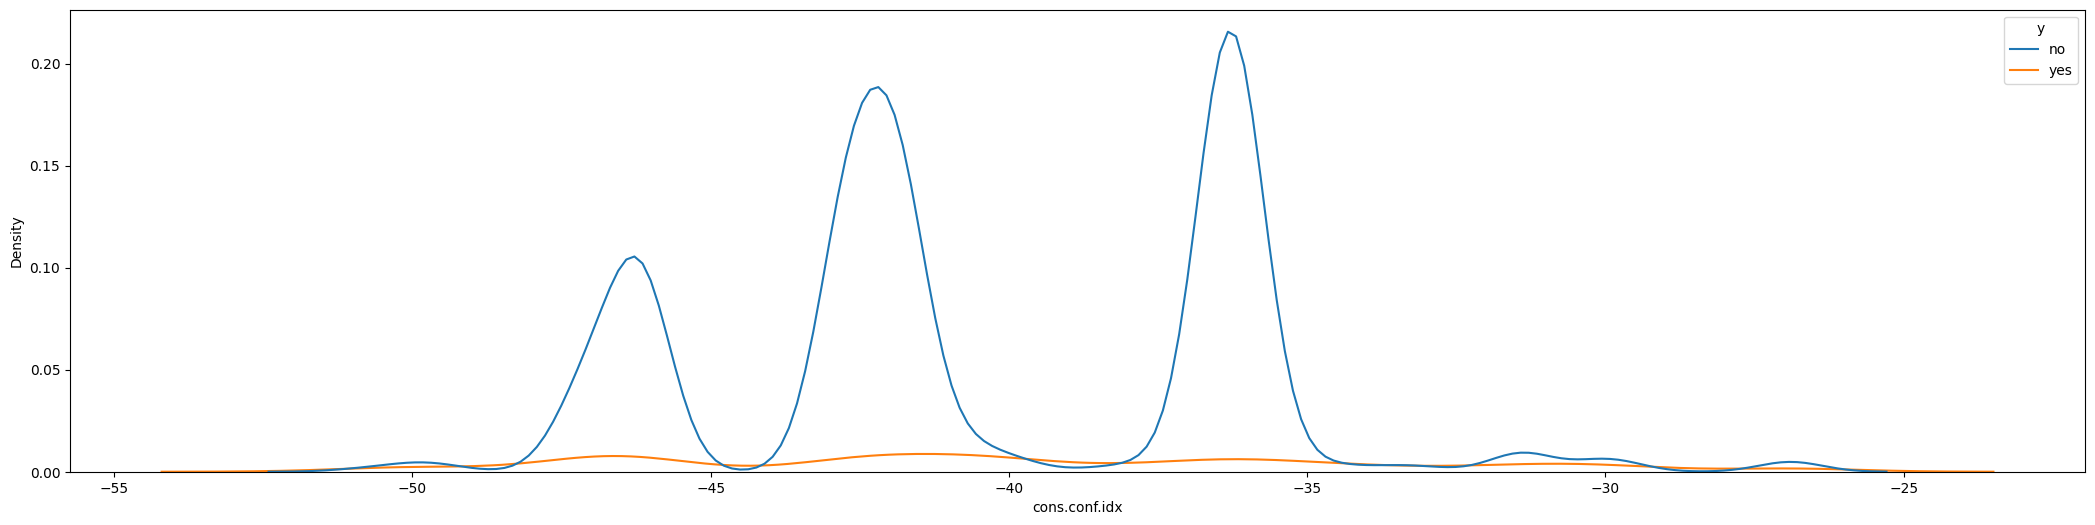

In [195]:
plt.figure(figsize=(26,6))
ax = sns.kdeplot(data = data, x = data['cons.conf.idx'], hue= data['y'])

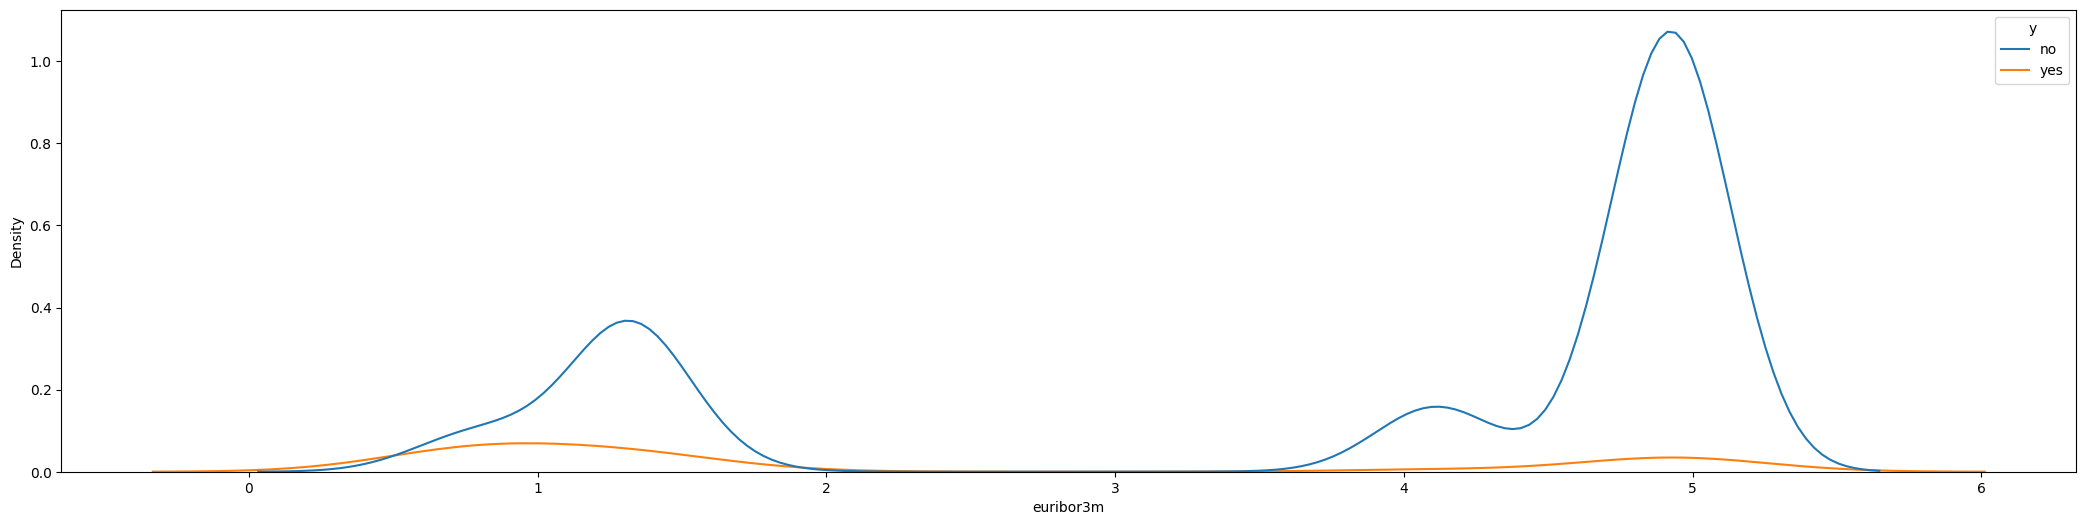

In [178]:
plt.figure(figsize=(26,6))
ax = sns.kdeplot(data = data, x = data['euribor3m'], hue= data['y'])

In [174]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

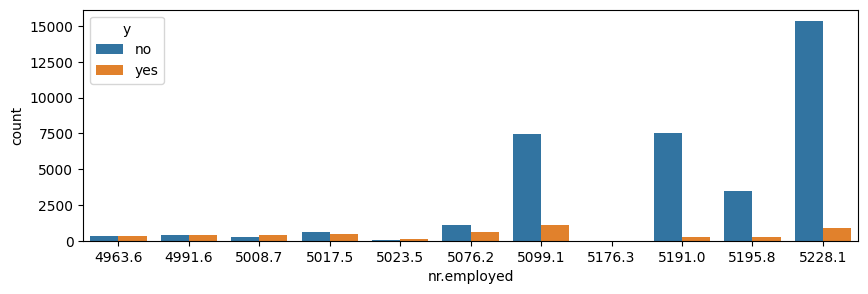

In [188]:
plt.figure(figsize=(10,3))
ax = sns.countplot(data = data, x = data['nr.employed'], hue= data['y'])

#### Observations are

- Customers of `age` between 30 to 40 years tend to convert more than other age categoies
- Customers who works in services, admin, blue-collar, technicain, retired,managment and students categories have more chance of conversion.
- Customers who are married or single have more chance of conversion.
- Customers who've done high school, degree or professional course have more chance of conversion.
- Customers who does't have  personal loan have more chance of conversion.
- Customers who uses cell phone have more chance of conversion than telephone.
- Chances of conversion is more during `April to August`.
- Customers who doesn't convert even after contacting 4 times during campaign. are very rare to convert even if we try to contact more number of times.
- From `pdays` column we can see Chances of conversion of customers who was not part of last campaign is high.
- From `previous` column we can see Customers who were never contacted before have higher conversion.
- From `poutcome` column we can see Customers who were not part of last campanign and Customers who converted during last campanign have higher conversion.
- From `cons.price.idx` column we can see Customers conversion was decreasing with increase in consumer price index (Inflation)
- Columns `cons.price.idx, cons.conf.idx, euribor3m, and nr.employed` doesn't shows any visible relationship with `y`.


In [189]:
## We can create a function to do bi variate analysis
# but fig size becomes too large

In [193]:
"""

def bivariate_countplot(data, column, fig_size = (5,3), nrows=3, ncols=3, rotation = 90):
    
    fig , axes = plt.subplots(nrows= nrows, ncols=ncols, figsize= fig_size)
    
    count = 0
    for i in range(nrows):
        for j in range(ncols):
            #axes[i,j].title.set_text(column[count])
            temp = sns.countplot(data =data, x = data[column[count]], hue = data['y'], ax= axes[i,j])
            temp.set_xticklabels(temp.get_xticklabels(),rotation= rotation )
            count = count + 1
            plt.plot()
            
"""

# bivariate_countplot(data, ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month','day_of_week'], fig_size = (35,45), nrows=3, ncols=3, rotation=90)

"\n\ndef bivariate_countplot(data, column, fig_size = (5,3), nrows=3, ncols=3, rotation = 90):\n    \n    fig , axes = plt.subplots(nrows= nrows, ncols=ncols, figsize= fig_size)\n    \n    count = 0\n    for i in range(nrows):\n        for j in range(ncols):\n            #axes[i,j].title.set_text(column[count])\n            temp = sns.countplot(data =data, x = data[column[count]], hue = data['y'], ax= axes[i,j])\n            temp.set_xticklabels(temp.get_xticklabels(),rotation= rotation )\n            count = count + 1\n            plt.plot()\n            \n"

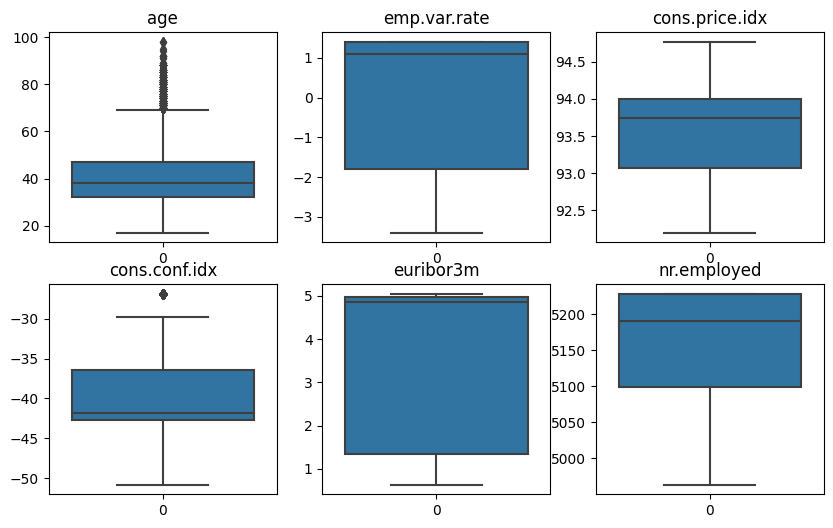

In [234]:
fig, axes = plt.subplots(2,3, figsize = (10,6))

axes[0,0].title.set_text('age')
sns.boxplot(data=data['age'], ax= axes[0,0])

axes[0,1].title.set_text('emp.var.rate')
sns.boxplot(data=data['emp.var.rate'], ax= axes[0,1])

axes[0,2].title.set_text('cons.price.idx')
sns.boxplot(data=data['cons.price.idx'], ax= axes[0,2])

axes[1,0].title.set_text('cons.conf.idx')
sns.boxplot(data=data['cons.conf.idx'], ax= axes[1,0])

axes[1,1].title.set_text('euribor3m')
sns.boxplot(data=data['euribor3m'], ax= axes[1,1])

axes[1,2].title.set_text('nr.employed')
sns.boxplot(data=data['nr.employed'], ax= axes[1,2])

plt.show()

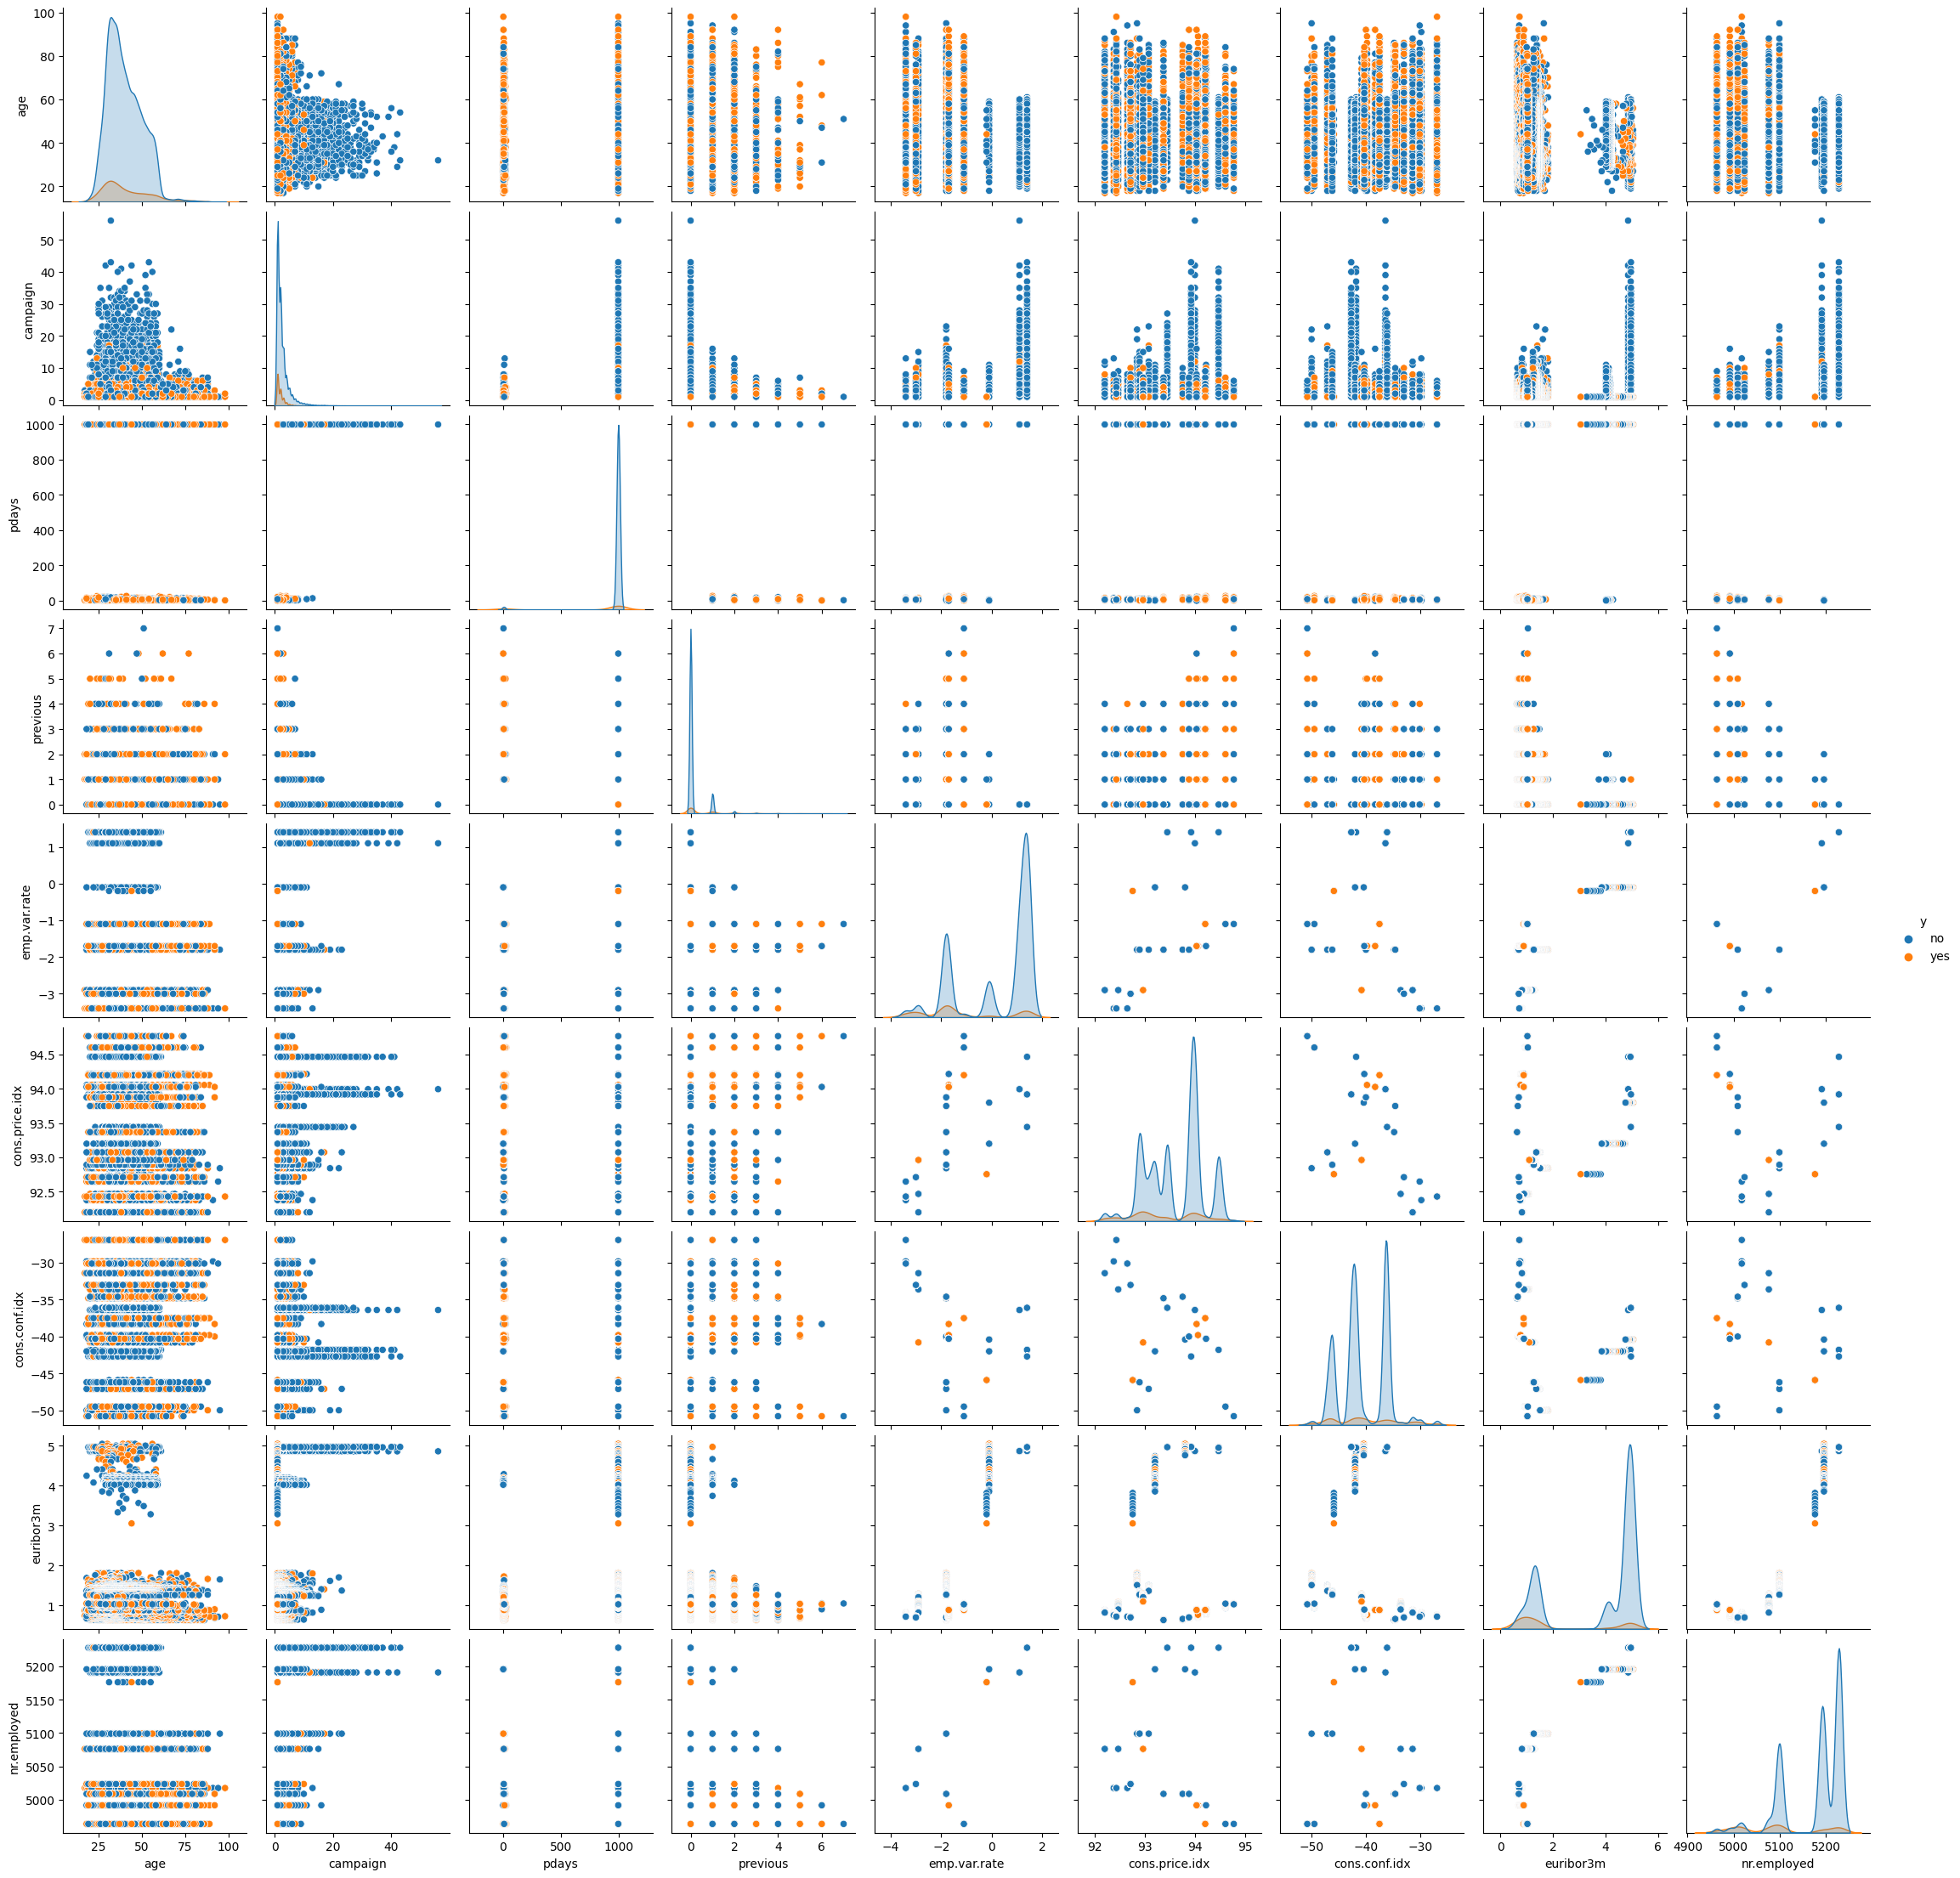

In [235]:
# sns.pairplot(data, hue='y')